# Инструменты для работы с языком

... или зачем нужна предобработка.

## Задача: классификация твитов по тональности

У нас есть выборка из твитов.
Нам известна эмоциональная окраска каждого твита из выборки: положительная или отрицательная. Задача состоит в построении модели, которая по тексту твита предсказывает его эмоциональную окраску.

Классификацию по тональности используют в рекомендательных системах, чтобы понять, понравилось ли людям кафе, кино, etc.

Скачиваем выборку ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

In [ ]:
# !wget -O positive.csv https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0

In [ ]:
# !head positive.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
tweets = pd.read_csv('/content/drive/MyDrive/HSE_DL_2022/week_08/rusentitweet_full.csv')

In [ ]:
tweets.head()

,Unnamed: 0,text,label,id
0,0,@varlamov @McFaul На,skip,1327934765807308801
1,1,велл они всё равно что мусор так что ничего с...,negative,1252943181387350017
2,2,"""трезвая жизнь какая-то такая стрёмная""\r\n(с)...",negative,1323610669061677056
3,3,Ой какие неожиданные результаты 🤭 https://t.co...,neutral,1336231661160247297
4,4,@Shvonder_chief @dimsmirnov175 На заборе тоже ...,neutral,1292421736454127617
...,...,...,...,...
13387,13387,все пора спать пиздец словила шизу,negative,1310349554911457286
13388,13388,такими темпами я создам новую секту или органи...,neutral,1326638109317066752
13389,13389,"Ты смотрела аниме, завернувшись в одеяло ,пока...",neutral,1333159916505362433
13390,13390,@AlyonaPikachu Пиздануться,negative,1308341976455053312


In [ ]:
# !wget -O negative.csv https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0

In [ ]:
# !head negative.csv

In [ ]:
import pandas as pd # библиотека для удобной работы с датафреймами
import numpy as np # библиотека для удобной работы со списками и матрицами

# библиотека, где реализованы основные алгоритмы машинного обучения
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Откроем файлы и создадим массив из текстов и правильных меток для твитов.
Сначала идут положительные твиты, потом отрицательные.

In [ ]:
tweets.loc[tweets['label'] == 'positive']

,Unnamed: 0,text,label,id
8,8,@BTS_twt ты такой красивый 😭😭😭🥺💓,positive,1281551551706865665
11,11,@okdaa @wifeyoonminn @Y_Yoon_ Но ты очень крас...,positive,1236273859671834624
13,13,@Susanoo51489064 ВХВХВХ,positive,1289926968608264193
18,18,@yoursungshine малышка спи сладко ❤,positive,1338933271082770433
23,23,как же я люблю титьки https://t.co/C2M8rMDFyc,positive,1218926151227318272
...,...,...,...,...
13373,13373,ВО МНЕ ЗАПЕРТ ДУХ ФОРСАЖА,positive,1282789022402830336
13374,13374,Это я сейчас 🙃 https://t.co/yAZgkGCqJz,positive,1255631185025384448
13378,13378,"@rambutan_kun @zabuivchivaya Круто, однако 👍 Н...",positive,1276853260146692103
13380,13380,@X0mJowFiaMngQA4 @WffEkyNJyRg3Aop Ты гляди как...,positive,1277937437382189057


In [ ]:
# загружаем положительные твитты
#positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
# расставляем метки
#positive['label'] = ['positive'] * len(positive)

positive = tweets.loc[tweets['label'] == 'positive']

# загружаем отрицательные твитты

negative = tweets.loc[tweets['label'] == 'negative']


#negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
# расставляем метки
#negative['label'] = ['negative'] * len(negative)

# соединяем два набора данных
df = positive.append(negative)
df.head()

<ipython-input-32-ca8829356c1c>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = positive.append(negative)


,Unnamed: 0,text,label,id
8,8,@BTS_twt ты такой красивый 😭😭😭🥺💓,positive,1281551551706865665
11,11,@okdaa @wifeyoonminn @Y_Yoon_ Но ты очень крас...,positive,1236273859671834624
13,13,@Susanoo51489064 ВХВХВХ,positive,1289926968608264193
18,18,@yoursungshine малышка спи сладко ❤,positive,1338933271082770433
23,23,как же я люблю титьки https://t.co/C2M8rMDFyc,positive,1218926151227318272


Посмотрим на полученные данные:

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.sample(5, random_state=40)

,text,label
12028,"За окном снова дождь. Заебал, мы скоро уплывем...",negative
1771,@chikibammasha Это звучит как идея для видео 🤣🤣🤣,positive
11849,@niemalsnoch @veritas_z ну кто ты и кто залина...,negative
10670,"@Zefirni_chel ГОСПОДИ, ДА!!!",positive
13134,@kpru Ковид его забери и в Аду его задержи,negative


In [ ]:
df.shape

(5712, 2)

Разбиваем данные на обучающую и тестовую выборки с помощью функции ```train_test_split()``` из **sklearn**:


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

## Baseline: классификация необработанных n-грамм

### Векторизаторы

Векторизатор преобразует слово или набор слов в числовой вектор, понятный алгоритму машинного обучения, который привык работать с числовыми табличными данными.

Ниже - пример преобразования слов в двумерных вектор, каждому слову соответствует точка на плоскости.

<a href="https://drive.google.com/uc?id=1ukv-FTj0jeVdcgVlOaNBocUfNuYGGVZg
" target="_blank"><img src="https://drive.google.com/uc?id=1ukv-FTj0jeVdcgVlOaNBocUfNuYGGVZg"
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>

На начальном этапе нам будет достаточно тех инструментов, которые уже есть в знакомой нам библиотеке **sklearn**.

In [ ]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer # модель "мешка слов"

## Что такое n-граммы:

Самые мелкие структуры языка, с которыми мы работаем, называются **n-граммами**.
У n-граммы есть параметр n - количество слов, которые попадают в такое представление текста.
* Если n = 1 - то мы смотрим на то, сколько раз каждое слово встретилось в тексте. Получаем _униграммы_
* Если n = 2 - то мы смотрим на то, сколько раз каждая пара подряд идущих слов, встретилась в тексте. Получаем _биграммы_

Функция для работы с n-граммами реализована в библиотке **nltk** (Natural Language ToolKit), импортируем эту функцию:

In [ ]:
from nltk import ngrams

Прежде чем получать n-граммы, нужно разделить предложение на отдельные слова.  Для этого используем метод ```split()```.

In [ ]:
sent = 'Если б мне платили каждый раз'.split()
sent

['Если', 'б', 'мне', 'платили', 'каждый', 'раз']

Чтобы получить n-грамму для такой последовательности, используем функцию ```ngrams()```.

На вход передается два параметра:
* лист с разделенным на отдельные слова предложением (у нас он хранится в переменной ```sent```);
* параметр n, определяющий, какой тип n-грамм мы хотим получить.


Чтобы полученный объект отобразить, делаем из него ```list```.

In [ ]:
list(ngrams(sent, 1)) # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

Аналогично мы можем получить биграммы - для этого заменяем параметр **n** в функции **ngrams** с 1 на 2.

In [ ]:
list(ngrams(sent, 2)) # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [ ]:
list(ngrams(sent, 3)) # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [ ]:
list(ngrams(sent, 5)) # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

Самый простой способ извлечь признаки из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает следующую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

<a href="https://drive.google.com/uc?id=1ukv-FTj0jeVdcgVlOaNBocUfNuYGGVZg
" target="_blank"><img src="https://drive.google.com/uc?id=1jHmkrGZTMawM46Yzxh243Ur1y5pYKzrl"
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>

На рисунке пример векторизации для униграмм, но можно использовать любые n-граммы. Для этого у объекта ```CountVectorizer()``` есть параметр **ngram_range**, который отвечает за то, какие n-граммы мы используем в качестве признаов:<br/>
ngram_range=(1, 1) -- униграммы<br/>
ngram_range=(3, 3) -- триграммы<br/>
ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

Инициализируем ```CountVectorizer()```, указав в качестве признаков униграммы:

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 1))

После инициализации _vectorizer_ можно обучить на наших данных.

Как обычно, для обучения используем обучающую выборку ```x_train```, но в отличие от классификатора мы используем метод ```fit_transform()```: сначала обучаем наш векторизатор, а потом сразу применяем его к нашему набору данных.


In [ ]:
vectorized_x_train = vectorizer.fit_transform(x_train)

In [ ]:
vectorized_x_train.mean()

0.000599617948100657

Так как результат не зависит от порядка слов в текстах, то говорят, что такая модель представления текстов в виде векторов получается из *гипотезы представления текста как мешка слов*

В vectorizer.vocabulary_ лежит словарь, отображение слов в их индексы:

В нашей выборке 170125 текстов (твитов), в них встречается 243672 разных слов.

In [ ]:
x_train.shape

(4284,)

In [ ]:
vectorized_x_train.shape

(4284, 14579)

In [ ]:
vectorized_x_train[:10]

<10x14579 sparse matrix of type '<class 'numpy.int64'>'
	with 104 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorized_x_train[:10])

  (0, 4340)	1
  (0, 4351)	1
  (0, 5381)	1
  (0, 5427)	1
  (0, 6001)	1
  (0, 6026)	1
  (0, 6116)	1
  (0, 8141)	1
  (0, 8175)	1
  (0, 8731)	1
  (0, 9260)	1
  (0, 11760)	1
  (0, 13063)	1
  (0, 14491)	1
  (1, 4798)	1
  (1, 5329)	1
  (1, 6710)	1
  (1, 6713)	1
  (1, 8175)	1
  (1, 8224)	1
  (1, 8227)	1
  (1, 8383)	1
  (1, 8465)	1
  (1, 8476)	1
  (1, 9066)	1
  :	:
  (7, 10295)	1
  (7, 10681)	1
  (7, 10693)	1
  (7, 12391)	1
  (7, 12879)	1
  (7, 13011)	1
  (7, 14491)	1
  (8, 2260)	1
  (8, 6029)	1
  (8, 8888)	1
  (8, 10032)	1
  (8, 10732)	1
  (8, 11324)	1
  (8, 13063)	1
  (8, 14235)	1
  (8, 14491)	1
  (9, 4552)	1
  (9, 4955)	1
  (9, 6964)	1
  (9, 7222)	1
  (9, 8651)	1
  (9, 10011)	1
  (9, 11601)	1
  (9, 11804)	1
  (9, 14237)	1


Так как теперь у нас есть **численное представление** и набор входных признаков, то мы можем обучить модель логистической регрессии (или любую другую из тех, на которые мы смотрели раньше, например, случайный лес)

In [ ]:
clf = LogisticRegression(random_state=42) # фиксируем random_state для воспроизводимости результатов
clf.fit(vectorized_x_train, y_train)

LogisticRegression(random_state=42)

С тестовыми данными нужно проделать то же самое, что и с данными для обучения: сделать из текстов вектора, которые можно передавать в классификатор для прогноза класса объекта.

У нас уже есть обученный векторизатор ```vectorizer```, поэтому используем метод ```transform()``` (просто применить его), а не ```fit_transform``` (обучить и применить).

In [ ]:
vectorized_x_test = vectorizer.transform(x_test)

Как раньше, для получения прогноза у обученного классификатора используем метод ```predict()```.

С помощью функции ```classification_report()``` можно теперь посмотреть на то, насколько хорошо мы предсказываем положительную или отрицательную тональность твита .

In [ ]:
pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.78      0.82      0.80       839
    positive       0.72      0.67      0.70       589

    accuracy                           0.76      1428
   macro avg       0.75      0.74      0.75      1428
weighted avg       0.76      0.76      0.76      1428



In [ ]:
clf

LogisticRegression(random_state=42)

In [ ]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Попробуем сделать то же самое, используя в качестве признаков триграммы:

In [ ]:
# инициализируем векторайзер
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))

# обучаем его и сразу применяем к x_train
trigram_vectorized_x_train = trigram_vectorizer.fit_transform(x_train)

# инициализируем и обучаем классификатор
clf = LogisticRegression(random_state=42)
clf.fit(trigram_vectorized_x_train, y_train)

# применяем обученный векторайзер к тестовым данным
trigram_vectorized_x_test = trigram_vectorizer.transform(x_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(trigram_vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.60      0.99      0.75       839
    positive       0.83      0.05      0.10       589

    accuracy                           0.60      1428
   macro avg       0.72      0.52      0.42      1428
weighted avg       0.70      0.60      0.48      1428



Как вы думаете, почему в результатах теперь такой разброс по сравнению с униграммами?

## Бонус*: TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений выдает **tf-idf** каждого слова.

Как считается tf-idf:

**TF (term frequency)** – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_{t}}{\sum_k n_{k}} $$

**IDF (inverse document frequency)** – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

Перемножаем их:
$$TFIDF(t, d, D) = TF(t,d) \times IDF(i, D)$$

Сакральный смысл: если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом
количестве документов, у него высокий TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Действуем аналогично, как с ```CountVectorizer()```:

In [ ]:
# инициализируем векторайзер, в качестве переменных используем униграммы
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))

# обучаем его и сразу применяем к x_train
tfidf_vectorized_x_train = tfidf_vectorizer.fit_transform(x_train)

# инициализируем и обучаем классификатор
clf = LogisticRegression(random_state=42)
clf.fit(tfidf_vectorized_x_train, y_train)

# применяем обученный векторайзер к тестовым данным
tfidf_vectorized_x_test = tfidf_vectorizer.transform(x_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(tfidf_vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.73      0.88      0.80       839
    positive       0.76      0.54      0.63       589

    accuracy                           0.74      1428
   macro avg       0.74      0.71      0.71      1428
weighted avg       0.74      0.74      0.73      1428



В этот раз получилось хуже :( Вернёмся к `CountVectorizer()`.

## Токенизация

Токенизировать - значит, поделить текст на части: слова, ключевые слова, фразы, символы и т.д., иными словами **токены**.

Самый наивный способ токенизировать текст - разделить с помощью `split()`. Но `split` упускает очень много всего, например, не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем, поэтому лучше использовать готовые токенизаторы.

In [ ]:
import nltk # уже знакомая нам библиотека nltk
from nltk.tokenize import word_tokenize # готовый токенизатор библиотки nltk

Чтобы использовать токенизатор ```word_tokenize```, нужно сначала скачать данные для nltk о пунктуации и стоп-словах. Это просто требование nltk, поэтому, особо не задумываясь, запустите следующую ячейку:

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Применим токенизацию:

In [ ]:
example = 'Но не каждый хочет что-то исправлять:('
word_tokenize(example)

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять', ':', '(']

Если использовать просто ```split()```, то грустный смайлик :( не отделяется от слова "исправлять":

In [ ]:
example.split()

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять:(']

В nltk вообще есть довольно много токенизаторов:

In [ ]:
from nltk import tokenize
dir(tokenize)

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordDetokenizer',
 'TreebankWordTokenizer',
 'TweetTokenizer',
 'WhitespaceTokenizer',
 'WordPunctTokenizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_treebank_word_tokenizer',
 'api',
 'blankline_tokenize',
 'casual',
 'casual_tokenize',
 'destructive',
 'legality_principle',
 'line_tokenize',
 'load',
 'mwe',
 'punkt',
 're',
 'regexp',
 'regexp_span_tokenize',
 'regexp_tokenize',
 'repp',
 'sent_tokenize',
 'sexpr',
 'sexpr_tokenize',
 'simple',
 'sonority_sequencing',
 'stanford_segmenter',
 'string_span_tokenize',
 'texttiling',
 'toktok',
 'treebank',
 'util',
 'word_tok

Они умеют выдавать индексы начала и конца каждого слова-токена:

In [ ]:
wh_tok = tokenize.WhitespaceTokenizer()
list(wh_tok.span_tokenize(example))

[(0, 2), (3, 5), (6, 12), (13, 18), (19, 25), (26, 38)]

Некторые токенизаторы ведут себя специфично:

In [ ]:
tokenize.TreebankWordTokenizer().tokenize("don't stop me")

['do', "n't", 'stop', 'me']

А некоторые -- вообще не для текста на естественном языке:

In [ ]:
tokenize.SExprTokenizer().tokenize("(a (b c)) d e (f)")

['(a (b c))', 'd', 'e', '(f)']

**Токенизаторы подбираются под требования задачи!**

## Стоп-слова и пунктуация

**Стоп-слова** - это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе. Для модели это просто шум. А шум нужно убирать. По аналогичной причине убирают и пунктуацию.

In [ ]:
# импортируем стоп-слова из библиотеки nltk
from nltk.corpus import stopwords

# посмотрим на стоп-слова русского языка
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Знаки пунктуации лучше импортировать из модуля **String**. В нем хранятся различные наборы констант для работы со строками (пунктуация, алфавит и др.).

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Объединим стоп-слова и знаки пунктуации вместе и запишем в переменную ```noise```:

In [ ]:
noise = stopwords.words('russian') + list(punctuation)

Теперь нужно обучать нашу модель с учетом новых знаний про токенизацию и стоп-слова.

Для этого мы можем собрать новый векторизатор, передав ему на вход:
* какие n-граммы нам нужны, параметр **ngram_range**;
* какой токенизатор мы используем, параметр **tokenizer**;
* какие у нас стоп-слова, параметр **stop_words**.

*Напоминание:* мы используем готовый токенизатор ```word_tokenize```, а стоп-слова хранятся в переменной ```noise```

In [ ]:
# инициализируем умный векторайзер
smart_vectorizer = CountVectorizer(ngram_range=(1, 1),
                                   tokenizer=word_tokenize,
                                   stop_words=noise)

In [ ]:
# обучаем его и сразу применяем к x_train
smart_vectorized_x_train = smart_vectorizer.fit_transform(x_train)

# инициализируем и обучаем классификатор
clf = LogisticRegression(random_state=42)
clf.fit(smart_vectorized_x_train, y_train)

# применяем обученный векторайзер к тестовым данным
smart_vectorized_x_test = smart_vectorizer.transform(x_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(smart_vectorized_x_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.73      0.85      0.79       839
    positive       0.72      0.56      0.63       589

    accuracy                           0.73      1428
   macro avg       0.73      0.70      0.71      1428
weighted avg       0.73      0.73      0.72      1428



In [ ]:
test = ['Сегодня ужин в спортбаре, к сожалению']
test_fea = smart_vectorizer.transform(test)
clf.predict(test_fea)

array(['negative'], dtype=object)

Получилось лучше: accuracy выше, а также заметно подрос recall у негативного класса.

Что ещё можно сделать?

## Лемматизация

**Лемматизация** – это сведение разных форм одного слова к начальной форме – **лемме**. Почему это хорошо?
* Во-первых, естественно рассматривать как отдельный признак каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лематизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: mystem и pymorphy:

### [Mystem](https://tech.yandex.ru/mystem/)
Как с ним работать:
* можно скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - обертка для питона, работает медленнее, но это удобно

In [ ]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /bin

--2023-06-20 18:10:29--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.242, 5.45.205.243, 5.45.205.244, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.242|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cachev2-m9-2.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=235 [following]
--2023-06-20 18:10:29--  http://cachev2-m9-2.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=235
Resolving cachev2-m9-2.cdn.yandex.net (cachev2-m9-2.cdn.yandex.net)... 37.9.111.160, 2a02:6b8:c35:2:0:562:0:5
Connecting to cachev2-m9-2.cdn.yandex.net (cachev2-m9-2.cdn.yandex.net)|37.9.111.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz’

mystem-3.0-linux3.1 100%[=======

In [ ]:
from pymystem3 import Mystem

m = Mystem()
lemmas = m.lemmatize('А я иду, шагаю по Москве')
print(lemmas)

['а', ' ', 'я', ' ', 'идти', ', ', 'шагать', ' ', 'по', ' ', 'москва', '\n']



Посмотрим на полный разбор:

In [ ]:
text = 'А я иду, шагаю по Москве'

parsed = m.analyze(text)
parsed[-2]

{'analysis': [{'lex': 'москва',
   'wt': 1,
   'gr': 'S,гео,жен,неод=(пр,ед|дат,ед)'}],
 'text': 'Москве'}

In [ ]:
text = 'А я иду, шагаю по Маскве'

parsed = m.analyze(text)
parsed[6]

{'analysis': [{'lex': 'шагать',
   'wt': 1,
   'gr': 'V,несов,нп=непрош,ед,изъяв,1-л'}],
 'text': 'шагаю'}

В Mystem можно подавать весь текст, и тогда он будет успешно разрешать омонимию по контексту:


In [ ]:
lemmas = m.lemmatize('сорока любит все блестящее')
print(lemmas)

['сорока', ' ', 'любить', ' ', 'весь', ' ', 'блестящий', '\n']


In [ ]:
lemmas = m.lemmatize('более сорока станций метро откроются в этом году')
print(lemmas)

['более', ' ', 'сорок', ' ', 'станция', ' ', 'метро', ' ', 'открываться', ' ', 'в', ' ', 'этот', ' ', 'год', '\n']


### [Pymorphy](http://pymorphy2.readthedocs.io/en/latest/)
Это модуль на питоне, довольно быстрый и с кучей функций.

In [ ]:
# устанавливаем pymorphy2
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 74.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=5652409f329694c775f02b98756d5d8d3d5c21499a35ee498d5d2e39f5ac62e7
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


В pymorphy2 для морфологического анализа слов есть ```MorphAnalyzer()```:

In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

pymorphy2 работает с отдельными словами. Если дать ему на вход предложение - он его просто не лемматизирует, т.к. не понимает:

In [ ]:
sent

['Если', 'б', 'мне', 'платили', 'каждый', 'раз']

Лемматизируем слово "платили" из предложения ```sent``` с помощью метода ```parse()```:

In [ ]:
ana = pymorphy2_analyzer.parse(sent[3])
ana

[Parse(word='платили', tag=OpencorporaTag('VERB,impf,tran plur,past,indc'), normal_form='платить', score=1.0, methods_stack=((DictionaryAnalyzer(), 'платили', 2472, 10),))]

Выведем его нормальную форму:

In [ ]:
ana[0].normal_form

'платить'

## Словарь, закон Ципфа и закон Хипса

Закон Ципфа - эмпирическая закономерность: если все слова корпуса (словаря) текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно равна **1/n**

Иными словами, **частотность слов убывает очень быстро**.

Проверим закон на практике, для этого нам понадобится объект ```Counter()``` из библиотеки **collections**, который будет считать частоту использования слова:

In [ ]:
from collections import Counter

Следующая *магическая* ячейка создает словарь из текстов твиттов, просто запустите:

In [ ]:
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

55809


['BTS_twt',
 'ты',
 'такой',
 'красивый',
 '😭😭😭🥺💓',
 'okdaa',
 'wifeyoonminn',
 'Y_Yoon_',
 'Но',
 'ты']

А здесь мы считаем количество вхождений каждого слова в словарь, затем сортируем их по убыванию частоты вхождения.

In [ ]:
freq_dict = Counter(corpus) # считаем кол-во вхождений
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1]) # сортируем по убыванию
list(freq_dict_sorted)[:10]

[('я', 1132),
 ('не', 1104),
 ('и', 1033),
 ('https', 952),
 ('в', 945),
 ('что', 682),
 ('на', 593),
 ('с', 434),
 ('это', 432),
 ('Я', 421)]

Закон Ципфа в действии:

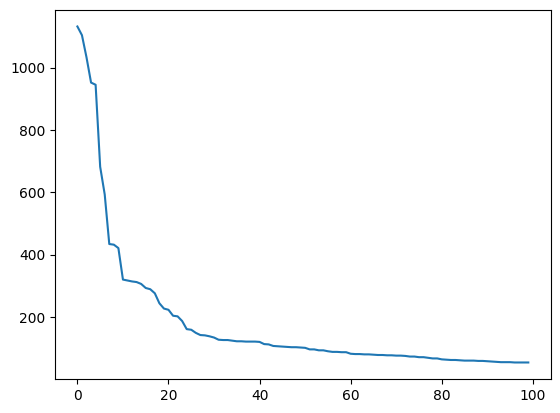

In [ ]:
# импортируем библиотеку для работы с графиками
import matplotlib.pyplot as plt
# указываем, что графики должны отображаться прямо в ноутбуке
%matplotlib inline

first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

Закон Хипса - обратная сторона закона Ципфа. Он описывает, что чем больше корпус (словарь), тем меньше новых слов добавляется с добавлением новых текстов. **В какой-то момент корпус насыщается.**

## О важности эксплоративного анализа

Но иногда пунктуация бывает и не шумом - главное отталкиваться от задачи. Что будет если вообще не убирать пунктуацию?

In [ ]:
# инициализируем умный векторайзер stop-words НЕ ИСПОЛЬЗУЕМ!
alternative_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                                               tokenizer=word_tokenize)

# обучаем его и сразу применяем к x_train
alternative_tfidf_vectorized_x_train = alternative_tfidf_vectorizer.fit_transform(x_train)

# инициализируем и обучаем классификатор
clf = LogisticRegression(random_state=42)
clf.fit(alternative_tfidf_vectorized_x_train, y_train)

# применяем обученный векторайзер к тестовым данным
alternative_tfidf_vectorized_x_test = alternative_tfidf_vectorizer.transform(x_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(alternative_tfidf_vectorized_x_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.76      0.87      0.81       839
    positive       0.77      0.61      0.68       589

    accuracy                           0.77      1428
   macro avg       0.77      0.74      0.75      1428
weighted avg       0.77      0.77      0.76      1428



Шок! Стоило оставить пунктуацию -- и все метрики равны 1. Как это получилось? Среди неё были очень значимые токены (как вы думаете, какие?).

**Упражнение:** Найдите 10 признаков (токенов) с самыми большими коэффициентами:

In [ ]:
coefs = np.abs(clf.coef_)

best_idxs = np.argsort(coefs)[0][::-1][:10]
idx_to_token = {value: key for key, value in alternative_tfidf_vectorizer.vocabulary_.items()}
top_tokens = []
for idx in best_idxs:
  print(idx_to_token[idx])
  top_tokens.append(idx_to_token[idx])

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [ ]:
cool_token = top_tokens[0]
pred = ['negative' if cool_token in tweet else 'positive' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.97     26460
    positive       1.00      0.95      0.98     30249

    accuracy                           0.97     56709
   macro avg       0.97      0.98      0.97     56709
weighted avg       0.98      0.97      0.97     56709



In [ ]:
print(x_test[pred != y_test].iloc[1])

@BarmyMiss ахах, это и хорошо, даже очень хорошо с:
надеюсь на это, лол, а то еще ни разу не увидела ее на этой премии :-/


## Символьные n-граммы

Теперь в качестве признаков используем, например, униграммы символов:

In [ ]:
# char_vectorizer.vocabulary_

In [ ]:
# инициализируем векторайзер для символов
char_vectorizer = CountVectorizer(analyzer='char', preprocessor=lambda x: x.replace('(', '').replace(')', ''), ngram_range=(1, 1), stop_words=['(', ')'])

# обучаем его и сразу применяем к x_train
char_vectorized_x_train = char_vectorizer.fit_transform(x_train)

# инициализируем и обучаем классификатор
clf = LogisticRegression(random_state=42)
clf.fit(char_vectorized_x_train, y_train)

# применяем обученный векторайзер к тестовым данным
char_vectorized_x_test = char_vectorizer.transform(x_test)

# получаем предсказания и выводим информацию о качестве
pred = clf.predict(char_vectorized_x_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.70      0.83      0.76       839
    positive       0.67      0.50      0.58       589

    accuracy                           0.69      1428
   macro avg       0.69      0.67      0.67      1428
weighted avg       0.69      0.69      0.68      1428



10 признаков (токенов) с самыми большими коэффициентами

In [ ]:
coefs = np.abs(clf.coef_)

best_idxs = np.argsort(coefs)[0][::-1][:10]
idx_to_token = {value: key for key, value in char_vectorizer.vocabulary_.items()}
top_tokens = []
for idx in best_idxs:
  print(idx_to_token[idx])
  top_tokens.append(idx_to_token[idx])

🥰
💜
💗
🖤
🤗
💖
😎
💞
💓
💕


In [ ]:
coefs = np.abs(clf.coef_)

best_idxs = np.argsort(coefs)[0][::-1][:10]
idx_to_token = {value: key for key, value in char_vectorizer.vocabulary_.items()}
top_tokens = []
for idx in best_idxs:
  print(idx_to_token[idx])
  top_tokens.append(idx_to_token[idx])

D
|
^
%
*
&
…
—
O
є


Из предыдущего раздела уже понятно, почему на этих данных точность равна 1.

Символьные n-граммы используются, например, для задачи определения языка. Ещё одна замечательная особенность признаков-символов - для них не нужна токенизация и лемматизация, можно использовать такой подход для языков, у которых нет готовых анализаторов.

## Бонус*: регулярные выражения

Регулярные выражения - способ поиска и анализа строк. Например, можно понять, какие даты в наборе строк представлены в формате DD/MM/YYYY, а какие - в других форматах.

Или бывает, например, что перед работой с текстом, надо почистить его от своеобразного мусора: упоминаний пользователей, url и так далее.

Навык полезный, давайте в нём тоже потренируемся.

Для работы с регулярными выражениями есть библиотека **re**

In [ ]:
import re

В регулярных выражениях, кроме привычных символов-букв, есть специальные символы:
* **?а** - ноль или один символ **а**
* **+а** - один или более символов **а**
* **\*а** - ноль или более символов **а** (не путать с +)
* **.** - любое количество любого символа

Пример:
Выражению \*a?b. соответствуют последовательности a, ab, abc, aa, aac НО НЕ abb!

Рассмотрим подробно несколько наиболее полезных функций:

### findall
возвращает список всех найденных непересекающихся совпадений.

Регулярное выражение **ab+c.**:
* **a** - просто символ **a**
* **b+** - один или более символов **b**
* **c** - просто символ **c**
* **.** - любой символ


In [ ]:
result = re.findall('ab+c.', 'abcdefghijkabcabcxabc')
print(result)

['abcd', 'abca']


Вопрос на внимательность: почему нет abcx?

**Задание**: вернуть список первых двух букв каждого слова в строке, состоящей из нескольких слов.

### split
разделяет строку по заданному шаблону


In [ ]:
result = re.split(',', 'itsy, bitsy, teenie, weenie')
print(result)

['itsy', ' bitsy', ' teenie', ' weenie']


можно указать максимальное количество разбиений

In [ ]:
result = re.split(',', 'itsy, bitsy, teenie, weenie', maxsplit=2)
print(result)

['itsy', ' bitsy', ' teenie, weenie']


**Задание**: разбейте строку, состоящую из нескольких предложений, по точкам, но не более чем на 3 предложения.

### sub
ищет шаблон в строке и заменяет все совпадения на указанную подстроку

параметры: (pattern, repl, string)

In [ ]:
result = re.sub('a', 'b', 'abcabc')
print (result)

bbcbbc


**Задание**: напишите регулярное выражение, которое позволит заменить все цифры в строке на "DIG".

**Задание**: напишите  регулярное выражение, которое позволит убрать url из строки.

### compile
компилирует регулярное выражение в отдельный объект

In [ ]:
# Пример: построение списка всех слов строки:
prog = re.compile('[А-Яа-яё\-]+')
prog.findall("Слова? Да, больше, ещё больше слов! Что-то ещё.")

['Слова', 'Да', 'больше', 'ещё', 'больше', 'слов', 'Что-то', 'ещё']

**Задание**: для выбранной строки постройте список слов, которые длиннее трех символов.

**Задание**: вернуть список доменов (@gmail.com) из списка адресов электронной почты:

```
abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz
```

Если всё ещё осталось время: [регулярочный кроссворд ¯\_(ツ)_/¯](https://mariolurig.com/crossword/)